In [1]:
# Install core libraries for data analysis and ML
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configure display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [ ]:
data_path = "data/cumulative_2025.10.04_10.23.26.csv"

# Load dataset
df = pd.read_csv(data_path)

# Preview the first few rows
df.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

In [16]:
df['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

In [17]:
df['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

In [19]:
df_mismatch = df[df['koi_disposition'] != df['koi_pdisposition']]
df_mismatch[['koi_disposition', 'koi_pdisposition']]


,koi_disposition,koi_pdisposition
0,CONFIRMED,CANDIDATE
1,CONFIRMED,CANDIDATE
4,CONFIRMED,CANDIDATE
5,CONFIRMED,CANDIDATE
6,CONFIRMED,CANDIDATE
...,...,...
8817,CONFIRMED,CANDIDATE
8956,CONFIRMED,CANDIDATE
9014,CONFIRMED,CANDIDATE
9083,CONFIRMED,CANDIDATE


In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

rowid                 0
kepid                 0
kepoi_name            0
kepler_name        6817
koi_disposition       0
                   ... 
koi_dicco_mdec      599
koi_dicco_msky      599
koi_dikco_mra       570
koi_dikco_mdec      570
koi_dikco_msky      570
Length: 83, dtype: int64

In [52]:
# Keep only CONFIRMED and FALSE POSITIVE rows
df_filtered = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Check how many rows remain
print("Remaining rows:", len(df_filtered))
print(df_filtered['koi_disposition'].value_counts())

df_filtered['label'] = df_filtered['koi_disposition'].map({
    'CONFIRMED': 1,
    'FALSE POSITIVE': 0
})


Remaining rows: 7585
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
Name: count, dtype: int64


In [133]:
keep_cols = [
    # Target
    'koi_disposition', 'label',

    # Planetary / Transit features
    'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
    'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl',
    'koi_teq', 'koi_insol', 'koi_dor', 'koi_model_snr', 'koi_count',
    'koi_num_transits', 'koi_max_sngle_ev', 'koi_max_mult_ev',
    #'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', #Removed the flags

    # Stellar parameters
    'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass',

    # Photometric magnitudes (optional brightness indicators)
    'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag',
    'koi_jmag', 'koi_hmag', 'koi_kmag'
]

In [134]:
df_binary = df_filtered[keep_cols].copy()

# Drop text target column
df_binary.drop(columns=['koi_disposition'], inplace=True)

print("✅ Clean dataset shape:", df_binary.shape)
df_binary.head()

✅ Clean dataset shape: (7585, 32)


,label,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_model_snr,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,1,9.488036,170.538750,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,35.8,2,142.0,5.135849,28.470820,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,1,54.418383,162.513840,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,25.8,2,25.0,7.027669,20.109507,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
3,0,1.736952,170.307565,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,505.6,1,621.0,39.066550,541.895100,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,1,2.525592,171.595550,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,40.9,1,515.0,4.749945,33.191900,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
5,1,11.094321,171.201160,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,66.5,3,95.0,9.046456,55.204865,6046.0,4.486,-0.08,0.972,1.053,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll visualize a few features at a time to avoid clutter
numeric_cols = df_binary.drop(columns=['label']).select_dtypes(include=['float64', 'int64']).columns

# Configure plot style
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot each feature
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=df_binary)
    plt.title(f'Boxplot of {col} by Label (0=False Positive, 1=Confirmed)')
    plt.xlabel("Label")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [136]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

# Quick check
X.head()

✅ Features shape: (7585, 31)
✅ Target shape: (7585,)


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_model_snr,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,9.488036,170.538750,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,35.8,2,142.0,5.135849,28.470820,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,54.418383,162.513840,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,25.8,2,25.0,7.027669,20.109507,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
3,1.736952,170.307565,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,505.6,1,621.0,39.066550,541.895100,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,2.525592,171.595550,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,40.9,1,515.0,4.749945,33.191900,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
5,11.094321,171.201160,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,66.5,3,95.0,9.046456,55.204865,6046.0,4.486,-0.08,0.972,1.053,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132


In [137]:
missing_summary = df_binary.isnull().mean().sort_values(ascending=False)
missing_summary[missing_summary > 0]

koi_num_transits    0.089782
koi_max_mult_ev     0.089782
koi_max_sngle_ev    0.089782
koi_zmag            0.068425
koi_smet            0.036783
koi_incl            0.034278
koi_dor             0.034146
koi_srad            0.034146
koi_slogg           0.034146
koi_steff           0.034146
koi_model_snr       0.034146
koi_smass           0.034146
koi_teq             0.034146
koi_sma             0.034146
koi_prad            0.034146
koi_ror             0.034146
koi_depth           0.034146
koi_impact          0.034146
koi_srho            0.028873
koi_insol           0.028873
koi_imag            0.016744
koi_gmag            0.004614
koi_jmag            0.003296
koi_hmag            0.003296
koi_kmag            0.003296
koi_rmag            0.000923
koi_kepmag          0.000132
dtype: float64

In [138]:
df_binary = df_binary.fillna(df_binary.median(numeric_only=True))
df_binary.isnull().sum().sum()

np.int64(0)

In [139]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features:", X.shape, " Target:", y.shape)

# Quick check
X.head()

✅ Features: (7585, 31)  Target: (7585,)


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_model_snr,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,9.488036,170.538750,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,35.8,2,142.0,5.135849,28.470820,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,54.418383,162.513840,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,25.8,2,25.0,7.027669,20.109507,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
3,1.736952,170.307565,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,505.6,1,621.0,39.066550,541.895100,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,2.525592,171.595550,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,40.9,1,515.0,4.749945,33.191900,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
5,11.094321,171.201160,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,66.5,3,95.0,9.046456,55.204865,6046.0,4.486,-0.08,0.972,1.053,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132


In [215]:
from sklearn.model_selection import train_test_split

# Step 1 — Split into training+validation vs test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (6068, 31)
Test: (1517, 31)


In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train #scaler.fit_transform(X_train)
X_test_scaled = X_test #scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(6068, 31) (1517, 31)


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),        # number of trees
    'max_depth': [None, 5, 10, 20, 30],        # depth of each tree
    'min_samples_split': randint(2, 10),       # minimum samples to split a node
    'min_samples_leaf': randint(1, 10),        # minimum samples in a leaf
    'max_features': ['sqrt', 'log2', None],    # features considered at each split
    'bootstrap': [True, False]                 # whether to use bootstrap samples
}

# Randomized Search setup
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                # number of random combinations to try
    cv=3,                     # 3-fold cross-validation
    scoring='accuracy',       # metric to optimize
    verbose=1,
    random_state=42,
    n_jobs=-1                 # use all CPU cores
)

# Fit the search
rf_random.fit(X_train_scaled, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validation Score:", rf_random.best_score_)

# Evaluate best model on test set
best_rf = rf_random.best_estimator_
y_test_pred = best_rf.predict(X_test_scaled)
from sklearn.metrics import classification_report
print("Test Performance:\n", classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 847}
Best Cross-Validation Score: 0.9294649610586075
Test Performance:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.93      0.91      0.92       549

    accuracy                           0.94      1517
   macro avg       0.94      0.94      0.94      1517
weighted avg       0.94      0.94      0.94      1517



Test Performance:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.93      0.91      0.92       549

    accuracy                           0.94      1517
   macro avg       0.94      0.94      0.94      1517
weighted avg       0.94      0.94      0.94      1517



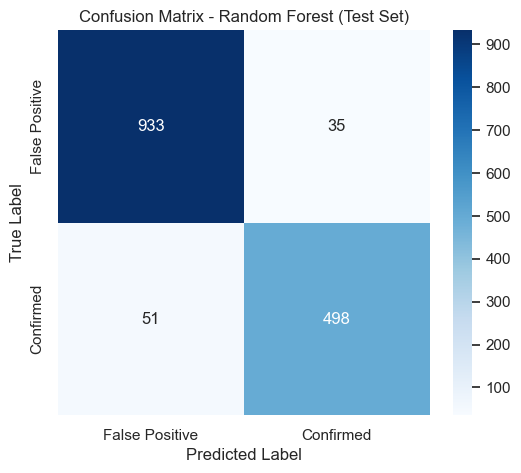

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_test_pred = best_rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Baseline Accuracy with ALL features: 0.9420
Test Performance:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.92      0.92      0.92       549

    accuracy                           0.94      1517
   macro avg       0.94      0.94      0.94      1517
weighted avg       0.94      0.94      0.94      1517



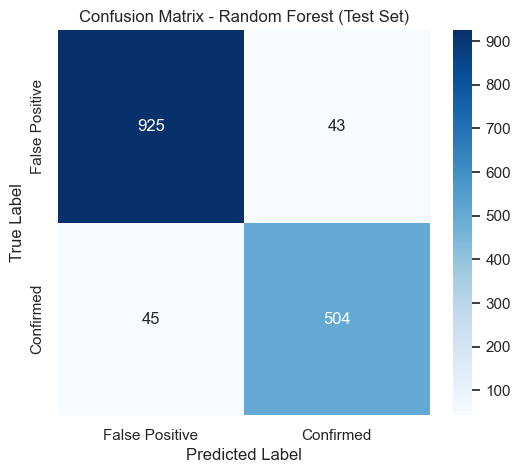

In [222]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=600,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, y_pred)

print(f"Baseline Accuracy with ALL features: {baseline_acc:.4f}")

y_test_pred = rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Threshold=0.20  Recall(Confirmed)=0.985  Accuracy=0.890
Threshold=0.22  Recall(Confirmed)=0.982  Accuracy=0.900
Threshold=0.24  Recall(Confirmed)=0.982  Accuracy=0.905
Threshold=0.26  Recall(Confirmed)=0.978  Accuracy=0.908
Threshold=0.28  Recall(Confirmed)=0.974  Accuracy=0.912
Threshold=0.30  Recall(Confirmed)=0.969  Accuracy=0.918
Threshold=0.32  Recall(Confirmed)=0.967  Accuracy=0.922
Threshold=0.34  Recall(Confirmed)=0.967  Accuracy=0.927
Threshold=0.36  Recall(Confirmed)=0.965  Accuracy=0.931
Threshold=0.38  Recall(Confirmed)=0.956  Accuracy=0.934
Threshold=0.40  Recall(Confirmed)=0.953  Accuracy=0.939
Threshold=0.42  Recall(Confirmed)=0.949  Accuracy=0.939
Threshold=0.44  Recall(Confirmed)=0.947  Accuracy=0.944
Threshold=0.46  Recall(Confirmed)=0.938  Accuracy=0.943
Threshold=0.48  Recall(Confirmed)=0.933  Accuracy=0.943
Threshold=0.50  Recall(Confirmed)=0.918  Accuracy=0.942
Threshold=0.52  Recall(Confirmed)=0.913  Accuracy=0.941
Threshold=0.54  Recall(Confirmed)=0.902  Accurac

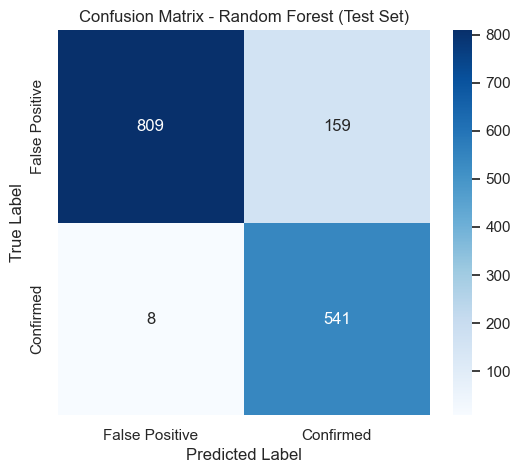

In [ ]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score

y_prob = rf.predict_proba(X_test)[:, 1]

best_thr, best_recall = 0.5, 0
for thr in np.arange(0.3, 0.61, 0.02):
    y_thr = (y_prob > thr).astype(int)
    rec = recall_score(y_test, y_thr, pos_label=1)
    acc = accuracy_score(y_test, y_thr)
    print(f"Threshold={thr:.2f}  Recall(Confirmed)={rec:.3f}  Accuracy={acc:.3f}")
    if rec > best_recall:
        best_recall, best_thr = rec, thr
print(f"\n🚀 Best threshold={best_thr:.2f} giving Recall={best_recall:.3f}")
y_best = (y_prob > best_thr).astype(int)
print("\nFinal report with tuned threshold:\n", classification_report(y_test, y_best))
cm = confusion_matrix(y_test, y_best)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

In [228]:
from sklearn.metrics import precision_recall_curve

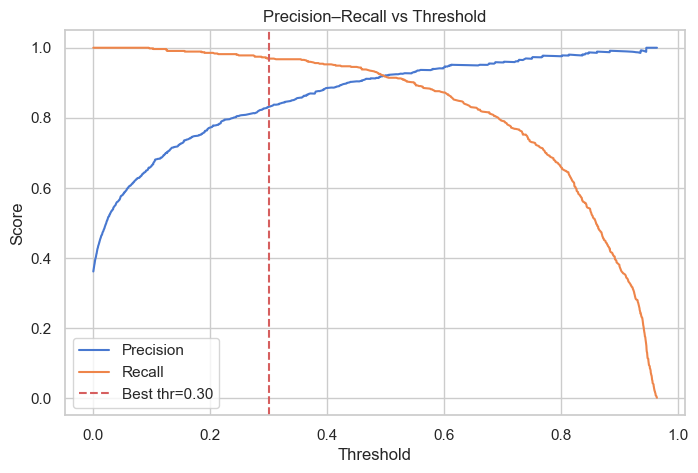

In [230]:
prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thr, prec[:-1], label='Precision')
plt.plot(thr, rec[:-1], label='Recall')
plt.axvline(best_thr, color='r', ls='--', label=f'Best thr={best_thr:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs Threshold')
plt.legend()
plt.show()


In [ ]:
!pip install tensorflow

In [188]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build model architecture
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,465 (56.50 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # part of train data used for validation
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8179 - loss: 0.3922 - val_accuracy: 0.8410 - val_loss: 0.3476
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8692 - loss: 0.3061 - val_accuracy: 0.8591 - val_loss: 0.3263
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8727 - loss: 0.2863 - val_accuracy: 0.8633 - val_loss: 0.3189
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8863 - loss: 0.2739 - val_accuracy: 0.8666 - val_loss: 0.3019
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8900 - loss: 0.2619 - val_accuracy: 0.8773 - val_loss: 0.3042
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8925 - loss: 0.2665 - val_accuracy: 0.8690 - val_loss: 0.2915
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8958 - loss: 0.2588 - val_accuracy: 0.8773 - val_loss: 0.2919
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8999 - loss: 0.2

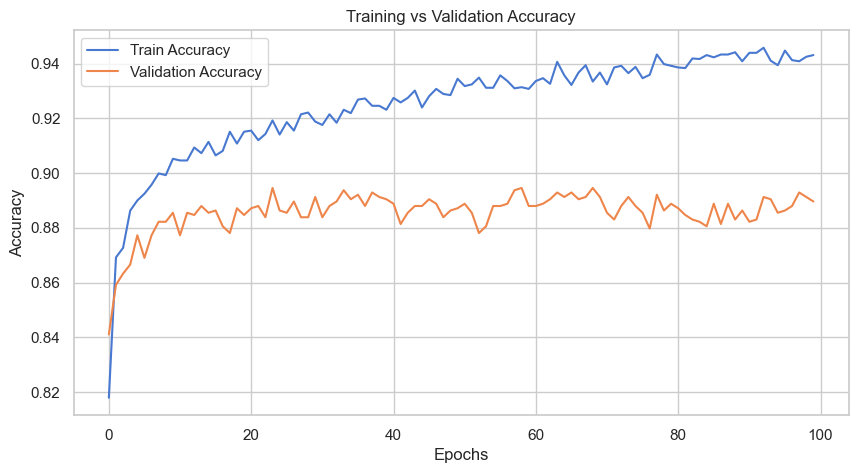

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [191]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# 🔹 1. Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test_scaled)

# 🔹 2. Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# 🔹 3. Print classification report
print("🧾 Test Set Performance:")
print(classification_report(y_test, y_pred))

# 🔹 4. Print overall accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
🧾 Test Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       968
           1       0.87      0.86      0.87       549

    accuracy                           0.90      1517
   macro avg       0.90      0.89      0.89      1517
weighted avg       0.90      0.90      0.90      1517

✅ Test Accuracy: 0.9031


In [192]:
!pip install keras-tuner --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [193]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Tune number of hidden layers and neurons
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        # Tune dropout rate
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune learning rate for Adam
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [196]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,          # number of combinations to try
    executions_per_trial=1, # train each combo once
    directory='tuner_dir',
    project_name='exoplanet_dl_tuning'
)
tuner.results_summary()


Results summary
Results in tuner_dir/exoplanet_dl_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")


In [ ]:
tuner.search(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Trial 20 Complete [00h 00m 03s]
val_accuracy: 0.9011532068252563

Best val_accuracy So Far: 0.9019769430160522
Total elapsed time: 00h 01m 22s


In [198]:
tuner.results_summary()

Results summary
Results in tuner_dir/exoplanet_dl_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 3
units_0: 192
dropout_0: 0.1
learning_rate: 0.0011649730037648692
units_1: 224
dropout_1: 0.4
units_2: 224
dropout_2: 0.30000000000000004
Score: 0.9019769430160522

Trial 19 summary
Hyperparameters:
num_layers: 1
units_0: 224
dropout_0: 0.1
learning_rate: 0.0014560799755276865
units_1: 64
dropout_1: 0.5
units_2: 256
dropout_2: 0.2
units_3: 192
dropout_3: 0.1
Score: 0.9011532068252563

Trial 14 summary
Hyperparameters:
num_layers: 3
units_0: 160
dropout_0: 0.4
learning_rate: 0.0013968946323924412
units_1: 256
dropout_1: 0.5
units_2: 160
dropout_2: 0.5
units_3: 128
dropout_3: 0.5
Score: 0.8995057940483093

Trial 17 summary
Hyperparameters:
num_layers: 3
units_0: 224
dropout_0: 0.2
learning_rate: 0.005017874183764034
units_1: 64
dropout_1: 0.5
units_2: 192
dropout_2: 0.1
units_3: 96
dropout_3: 0.1
Score: 0.898682057

In [201]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n🚀 Best Hyperparameters Found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")


🚀 Best Hyperparameters Found:
num_layers: 3
units_0: 192
dropout_0: 0.1
learning_rate: 0.0011649730037648692
units_1: 224
dropout_1: 0.4
units_2: 224
dropout_2: 0.30000000000000004


In [202]:
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,        # increase from 30 → 150
    batch_size=16,     # smaller batch → more granular updates
    verbose=1
)


Epoch 1/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8506 - loss: 0.3372 - val_accuracy: 0.8517 - val_loss: 0.3217
Epoch 2/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8778 - loss: 0.2867 - val_accuracy: 0.8682 - val_loss: 0.2958
Epoch 3/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8898 - loss: 0.2643 - val_accuracy: 0.8756 - val_loss: 0.2993
Epoch 4/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8941 - loss: 0.2572 - val_accuracy: 0.8781 - val_loss: 0.2818
Epoch 5/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9046 - loss: 0.2438 - val_accuracy: 0.8797 - val_loss: 0.2979
Epoch 6/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9050 - loss: 0.2362 - val_accuracy: 0.8822 - val_loss: 0.2924
Epoch 7/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9071 - loss: 0.2322 - val_accuracy: 0.8888 - val_loss: 0.2748
Epoch 8/150
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9071 - loss: 0

In [204]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# Metrics
print("🧾 Test Performance:\n", classification_report(y_test, y_pred))


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
🧾 Test Performance:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       968
           1       0.87      0.87      0.87       549

    accuracy                           0.91      1517
   macro avg       0.90      0.90      0.90      1517
weighted avg       0.91      0.91      0.91      1517



In [214]:
!pip install xgboost lightgbm catboost --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip



🧾 Extra Trees Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       968
           1       0.90      0.90      0.90       549

    accuracy                           0.93      1517
   macro avg       0.92      0.92      0.92      1517
weighted avg       0.93      0.93      0.93      1517

Accuracy: 0.9261700725115359


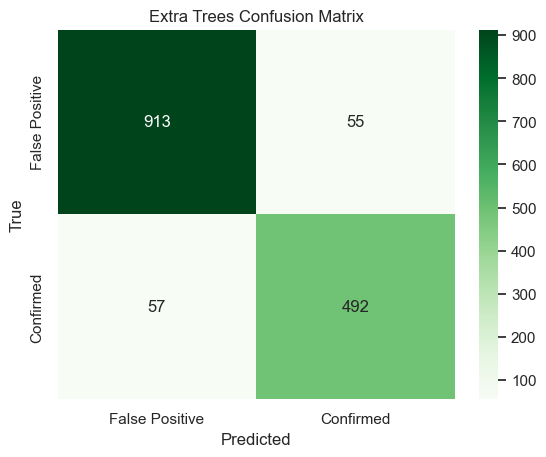

In [213]:
from sklearn.ensemble import  ExtraTreesClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt


# 🌳 Extra Trees (a stronger variant)
et = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("\n🧾 Extra Trees Report:")
print(classification_report(y_test, y_pred_et))
print("Accuracy:", accuracy_score(y_test, y_pred_et))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.title('Extra Trees Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
